# Assignment Task:
    Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

## Taskes:
    1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import accuracy_score,r2_score

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

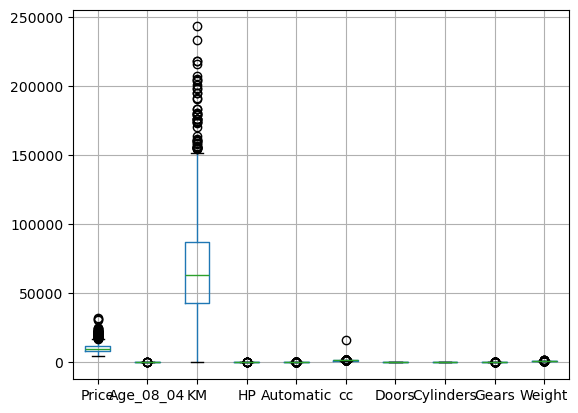

In [8]:
df.boxplot()
plt.show()

In [9]:
def outiler_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_Extreme= Q1-1.5*IQR
    Upper_Extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x:Lower_Extreme if x<Lower_Extreme else Upper_Extreme if x>Upper_Extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outiler_capping(df,col)

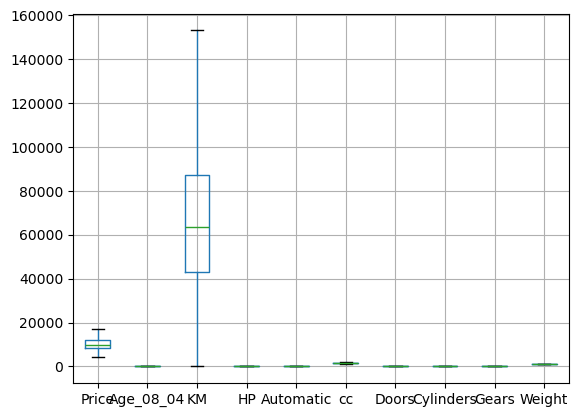

In [10]:
df.boxplot()
plt.show()

In [13]:
y=df[['Price']]
y

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0
...,...
1431,7500.0
1432,10845.0
1433,8500.0
1434,7250.0


In [20]:
x=df.drop(columns=['Price'])
x

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23.0,46986.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
1,23.0,72937.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
2,24.0,41711.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
3,26.0,48000.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
4,30.0,38500.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...
1431,69.0,20544.0,2,86.0,0.0,1300.0,3,4,5.0,1025.0
1432,72.0,19000.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,71.0,17016.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0
1434,70.0,16916.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0


In [18]:
label=LabelEncoder()
df['Fuel_Type']=label.fit_transform(df['Fuel_Type'])
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
1,13750.0,23.0,72937.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
2,13950.0,24.0,41711.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
3,14950.0,26.0,48000.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
4,13750.0,30.0,38500.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,2,86.0,0.0,1300.0,3,4,5.0,1025.0
1432,10845.0,72.0,19000.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0
1433,8500.0,71.0,17016.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0
1434,7250.0,70.0,16916.0,2,86.0,0.0,1300.0,3,4,5.0,1015.0


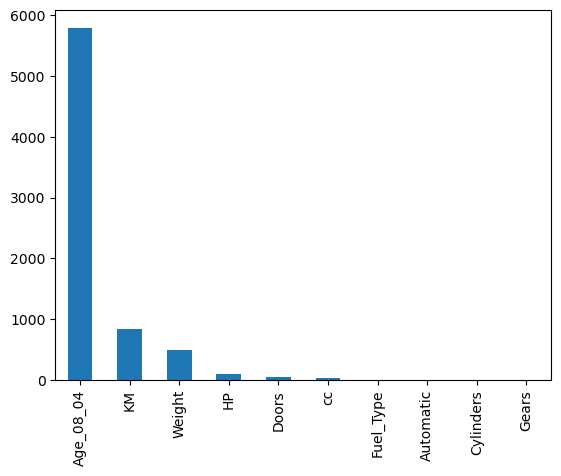

In [21]:
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')
f_reg=f_regression(x,y)
pd.Series(f_reg[0],index=x.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [22]:
x.drop(columns=['Fuel_Type','Automatic','Cylinders','Gears'],inplace=True)
x.head()

,Age_08_04,KM,HP,cc,Doors,Weight
0,23.0,46986.0,90.0,1900.0,3,1152.5
1,23.0,72937.0,90.0,1900.0,3,1152.5
2,24.0,41711.0,90.0,1900.0,3,1152.5
3,26.0,48000.0,90.0,1900.0,3,1152.5
4,30.0,38500.0,90.0,1900.0,3,1152.5


In [23]:
std=StandardScaler()
x[['Age_08_04','KM','HP','cc','Weight']]=std.fit_transform(x[['Age_08_04','KM','HP','cc','Weight']])
x.head()

,Age_08_04,KM,HP,cc,Doors,Weight
0,-1.781129,-0.595118,-0.844145,2.024972,3,2.226997
1,-1.781129,0.152463,-0.844145,2.024972,3,2.226997
2,-1.727143,-0.747078,-0.844145,2.024972,3,2.226997
3,-1.619171,-0.565908,-0.844145,2.024972,3,2.226997
4,-1.403226,-0.839578,-0.844145,2.024972,3,2.226997


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [26]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_predict_test=lin_reg.predict(x_test)

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [31]:
r2_score(y_test,y_predict_test)

0.8575431094496226

5.Apply Lasso and Ridge methods on the model.

In [32]:
las=Lasso(alpha=10)
las.fit(x_train,y_train)

Lasso(alpha=10)

In [33]:
las.intercept_

array([10714.51827825])

In [34]:
las.coef_

array([-1956.65070111,  -540.37759585,   334.1693138 ,  -367.44188401,
         -57.40072161,   874.99700299])

In [36]:
y_pred1= las.predict(x_test)
r2_score(y_test,y_pred1)

0.8576486274920457

In [37]:
ridge=Ridge(alpha=10)

In [38]:
ridge.fit(x_train,y_train)

Ridge(alpha=10)

In [39]:
ridge.intercept_

array([10796.68820863])

In [40]:
ridge.coef_

array([-1928.97030799,  -549.98439446,   344.92795699,  -395.56766142,
         -77.81504957,   917.23178861])

In [41]:
y_pred2= las.predict(x_test)
r2_score(y_test,y_pred2)

0.8576486274920457

## Interview Questions:
    1.What is Normalization & Standardization and how is it helpful?
    
       It is helpful to change all the values in the similar group of ranges.For a normalized data the statistical values will become constant.
       
    2.What techniques can be used to address multicollinearity in multiple linear regression?
    
             Variance Iinflation factor is one of the technique that is used to calculate the multicolinearity between the features 
